# Craft Beer Bar Sales

__Bar history:__

In the spring of 2016, we decided to open a beer bar that would be fun to return to for many years. To do this, we have done a lot of work. There are 30 taps on the board on the board of interesting beer from European, American and Russian new wave breweries, shelves and refrigerators for three hundred bottles, as well as the best cheese from regional cheese makers. In December of the same year, Nelson Sauvin opened - a spacious and cozy two-story bar with large windows in the very center of Yekaterinburg. The bar is open not only for experimental and Untappd check-ins, but also for Friday hangouts, dates or meeting with grandma. 🎉🎉🎉 In addition, we are engaged in the import of beer, which, in our opinion, is not enough in Russia.

## Product Range Dataset:

A product range is the set of all types and kinds of products (beer, snacks, soda and etc.) offered to customers by the Nelson Sauvin Bar. It can also be understood as a set of products offered by the entire industry. This range can be more or less specialized or generic. It is described by size, ABV, unit, price and etc. Range of offered products should correspond to the expectations of target market of the company.

- Product_code: Key for transactions merge
- Vendor_code: Manufacturer's name
- Name: SKU
- Retail_price: Catalog price
- Base_unit: Product unit
- Country_of_Origin: Manufacturer country
- Size: Sale item (SKU) size
- ABV: Alcohol by Volume
    - Below 5%: Light and sessionable craft beers, including some lagers and pale ales.
    - 5% to 7.5%: Includes a wide variety of craft beer styles, such as IPAs, stouts, porters, and some Belgian ales.
    - above 7.5%: This category includes strong ales, double IPAs, barleywines, imperial stouts, and other high-alcohol craft beer styles.

## Transactions Dataset:

This file is the sale of craft beer from a bar or other establishment. This type of beer is typically brewed in small batches, using traditional methods and high-quality ingredients. Craft beer bars typically offer a wide selection of craft beers from local and regional breweries, as well as from other parts of the world.

- Date_and_time_of_unloading: Date & Time when the manager unloaded the cash register
- Product_code: Key for product range merge
- Amount: The number of units sold.
- Sale_amount: Sales amount is the total amount of money that a business has earned from selling goods.
- Discount_amount: Discount amount is the amount of money that is deducted from the original price of a product.
- Profit: Profit is the difference between the revenue a company earns and the costs associated with producing and selling its
- Percentage_markup: Percentage markup is the amount by which the cost of a product is increased in order to determine the selling price.
- Discount_percentage: Percentage discount is a discount that is given to a product or service that is given as an amount per hundred.

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_prod = pd.read_csv('./Product_range.csv')
df_trans = pd.read_csv('./Transactions.csv')

# Data Cleaning
df = pd.merge(df_prod, df_trans,on='Product_code', how='inner') #Keep all the data points that are present in both datasets
df.dropna(subset=['ABV','Size','Country_of_Origin','Sale_amount'], inplace=True) #Dropping all instances of null values in 4 main columns
df.drop(columns=['Vendor_code','Percentage_markup','Discount_percentage','Retail_price','Base_unit'], inplace=True) #Entirely dropping 
df['Profit'] = df['Profit'].fillna(0) # Replace NaN with zeros

df['Discount_amount'] = df['Discount_amount'].fillna(0) # Replace NaN with zeros

# Function to categorize ABV
def categorize_abv(abv):
    if 0 <= abv <= 0.5:
        return 'Non-Alcoholic Beer'
    elif 0.5 < abv <= 4.2:
        return 'Light Beer'
    elif 4.2 < abv <= 5.9:
        return 'Regular Beers'
    else:
        return 'Strong Beers'
    
# Function to categorize Size
def categorize_size(volume):
    if 0 <= volume <= 335:
        return 'Standard'
    elif 336 < volume <= 755:
        return 'Large'
    else:
        return 'Extra Large'

df['ABV_Category'] = df['ABV'].apply(categorize_abv) 
df['Volume_Category'] = df['Size'].apply(categorize_size)


df['Date_and_time_of_unloading'] = pd.to_datetime(df['Date_and_time_of_unloading'])
df['Report_month'] = df['Date_and_time_of_unloading'].dt.month
df['Report_quarter'] = df['Date_and_time_of_unloading'].dt.quarter
df['Report_year'] = df['Date_and_time_of_unloading'].dt.year
df['Retail_sum'] = df['Sale_amount'] + df['Discount_amount']
df['Quarter_Year'] = df['Report_quarter'].astype(str) + 'Q-' + df['Report_year'].astype(str)

df = df[df['Report_year'] != 2022]

# Printing details
print("Dataframe Shape: ", df.shape)
df.head()


Dataframe Shape:  (32397, 17)


,Product_code,Name,Country_of_Origin,Size,ABV,Date_and_time_of_unloading,Amount,Sale_amount,Discount_amount,Profit,ABV_Category,Volume_Category,Report_month,Report_quarter,Report_year,Retail_sum,Quarter_Year
13,4302,18th Street Brewery Deal With The Devil 0.473,USA,0.473,8.5,2021-10-24 19:00:00,4.0,1133.98,1386.02,-214.02,Strong Beers,Standard,10,4,2021,2520.0,4Q-2021
17,4304,18th Street Brewery Pins And Needles 0.473,USA,0.473,8.5,2021-10-19 01:00:00,1.0,377.95,252.05,40.95,Strong Beers,Standard,10,4,2021,630.0,4Q-2021
18,4304,18th Street Brewery Pins And Needles 0.473,USA,0.473,8.5,2021-10-24 19:00:00,2.0,755.87,504.13,81.87,Strong Beers,Standard,10,4,2021,1260.0,4Q-2021
21,4300,18th Street Brewery Rise Of The Angels 0.473,USA,0.473,7.5,2021-10-19 01:00:00,1.0,311.96,208.04,32.96,Strong Beers,Standard,10,4,2021,520.0,4Q-2021
22,4300,18th Street Brewery Rise Of The Angels 0.473,USA,0.473,7.5,2021-10-24 19:00:00,1.0,311.99,208.01,32.99,Strong Beers,Standard,10,4,2021,520.0,4Q-2021


In [8]:
df.shape

(32397, 17)

In [9]:
df_wo_put = df[df['Country_of_Origin'] != 'Russia']
df_wo_put.shape


(19159, 17)

In [10]:
def custom_agg(group):

    return pd.Series({

        'Name': group['Name'].iloc[0],

        'Country_of_Origin': group['Country_of_Origin'].iloc[0],

        # 'Size': group['Size'].iloc[0],

        # 'ABV': group['ABV'].iloc[0],
        'ABV_Category': group['ABV_Category'].iloc[0],

        'Volume_Category': group['Volume_Category'].iloc[0],

        # 'Quarter_Year': group['Quarter_Year'].iloc[0],

        'Amount': group['Amount'].sum(),

        'Sale_amount': group['Sale_amount'].sum(),

        'Discount_amount': group['Discount_amount'].sum(),

        'Profit': group['Profit'].sum(),

        'Retail_sum': group['Retail_sum'].sum()
    })

grouped_df_wo_put = df_wo_put.groupby(['Quarter_Year', 'Product_code']).apply(custom_agg).reset_index()
# grouped_df = df.groupby(['Quarter_Year', 'Product_code']).apply(custom_agg).reset_index()

In [11]:
grouped_df_wo_put.shape

(3590, 11)

In [12]:
grouped_df_wo_put['Country_of_Origin'].value_counts()

Country_of_Origin
Belgium           607
Sweden            477
USA               457
United Kingdom    358
Netherlands       294
Denmark           285
Spain             274
Germany           193
France            124
Estonia           122
Norway            114
Italy              59
Canada             54
???                52
Ireland            45
Finland            44
Israel              9
Japan               8
Latvia              5
Poland              4
China               2
Scotland            1
Croatia             1
Czech               1
Name: count, dtype: int64

In [13]:
# To get the beers that have been sold more than 100 times from 2020 - 22
filtered_df = grouped_df_wo_put[grouped_df_wo_put['Country_of_Origin'].map(grouped_df_wo_put['Country_of_Origin'].value_counts()) > 100]

In [14]:
filtered_df['Country_of_Origin'].unique()

array(['Denmark', 'USA', 'Belgium', 'United Kingdom', 'Sweden',
       'Netherlands', 'Estonia', 'Spain', 'France', 'Germany', 'Norway'],
      dtype=object)

In [15]:
# Calculate the 75th percentile of sales for each country
country_percentiles = filtered_df.groupby('Country_of_Origin')['Sale_amount'].quantile(0.75).reset_index() 
# country_percentiles.shape

# Merge the percentiles with the original DataFrame
df_temp = filtered_df.merge(country_percentiles, on='Country_of_Origin', suffixes=('', '_75th_percentile')) 

# Filter the DataFrame to select products with sales greater than or equal to the 75th 
percentiletop_75_percent_products = df_temp[df_temp['Sale_amount'] >= df_temp['Sale_amount_75th_percentile']]

In [16]:
percentiletop_75_percent_products.drop(columns=['Sale_amount_75th_percentile'], inplace=True)

C:\Users\vinhp\AppData\Local\Temp\ipykernel_5816\515859230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentiletop_75_percent_products.drop(columns=['Sale_amount_75th_percentile'], inplace=True)


In [17]:
percentiletop_75_percent_products.shape

(832, 11)

In [18]:
percentiletop_75_percent_products['Country_of_Origin'].value_counts()

Country_of_Origin
Belgium           152
Sweden            120
USA               115
United Kingdom     90
Netherlands        74
Denmark            72
Spain              69
Germany            49
Estonia            31
France             31
Norway             29
Name: count, dtype: int64

In [19]:
percentiletop_75_percent_products['Profit per unit'] = percentiletop_75_percent_products['Profit']/percentiletop_75_percent_products['Amount']

C:\Users\vinhp\AppData\Local\Temp\ipykernel_5816\3765187253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentiletop_75_percent_products['Profit per unit'] = percentiletop_75_percent_products['Profit']/percentiletop_75_percent_products['Amount']


In [20]:
percentiletop_75_percent_products.head()

,Quarter_Year,Product_code,Name,Country_of_Origin,ABV_Category,Volume_Category,Amount,Sale_amount,Discount_amount,Profit,Retail_sum,Profit per unit
3,1Q-2020,441,Mikkeller Nelson Sauvin Brut Dry Hopped! Bière...,Denmark,Strong Beers,Standard,5.000,6119.77,1980.23,1520.67,8100.0,304.134000
7,1Q-2020,823,Mikkeller 12oz Wineale,Denmark,Strong Beers,Standard,16.625,17102.18,1517.82,7954.66,18620.0,478.475789
11,1Q-2020,1099,Mikkeller Hallo Ich Bin Berliner Weisse Raspberry,Denmark,Light Beer,Standard,21.750,14301.80,2228.20,7344.62,16530.0,337.683678
17,1Q-2020,1573,Mikkeller 12 Winale B-Sides Bière de Champagne...,Denmark,Strong Beers,Standard,6.000,5639.16,1560.84,2735.16,7200.0,455.860000
18,1Q-2020,1576,Mikkeller Hallo Ich Bin Berliner Weisse Bluebe...,Denmark,Light Beer,Standard,18.750,13432.71,1567.29,6668.25,15000.0,355.640000


In [21]:
percentiletop_75_percent_products.to_csv('cleaned_data.csv', index=False)

In [22]:
percentiletop_75_percent_products['Quarter_Year'].unique()

array(['1Q-2020', '1Q-2021', '2Q-2020', '2Q-2021', '3Q-2020', '3Q-2021',
       '4Q-2020', '4Q-2021'], dtype=object)

In [23]:
# Create a dictionary to map quarters to numerical values
quarter_to_number = {'1Q-2020': 1, '2Q-2020': 2, '3Q-2020': 3, '4Q-2020': 4, '1Q-2021': 5, '2Q-2021': 6, '3Q-2021': 7, '4Q-2021': 8}

percentiletop_75_percent_products['Rank'] = percentiletop_75_percent_products['Quarter_Year'].map(quarter_to_number)


C:\Users\vinhp\AppData\Local\Temp\ipykernel_5816\2891493585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentiletop_75_percent_products['Rank'] = percentiletop_75_percent_products['Quarter_Year'].map(quarter_to_number)


In [24]:
df_viz_1 = percentiletop_75_percent_products.groupby(['Country_of_Origin','Quarter_Year']).agg({'Profit per unit': 'sum'}).reset_index()
df_viz_1['Rank'] = df_viz_1['Quarter_Year'].map(quarter_to_number)
df_viz_1.sort_values(by='Rank', ascending=True, inplace=True)

In [25]:
df_viz_1.head()

,Country_of_Origin,Quarter_Year,Profit per unit,Rank
0,Belgium,1Q-2020,5810.701811,1
79,United Kingdom,1Q-2020,4357.365167,1
24,France,1Q-2020,875.809367,1
71,USA,1Q-2020,2316.120218,1
32,Germany,1Q-2020,738.483471,1


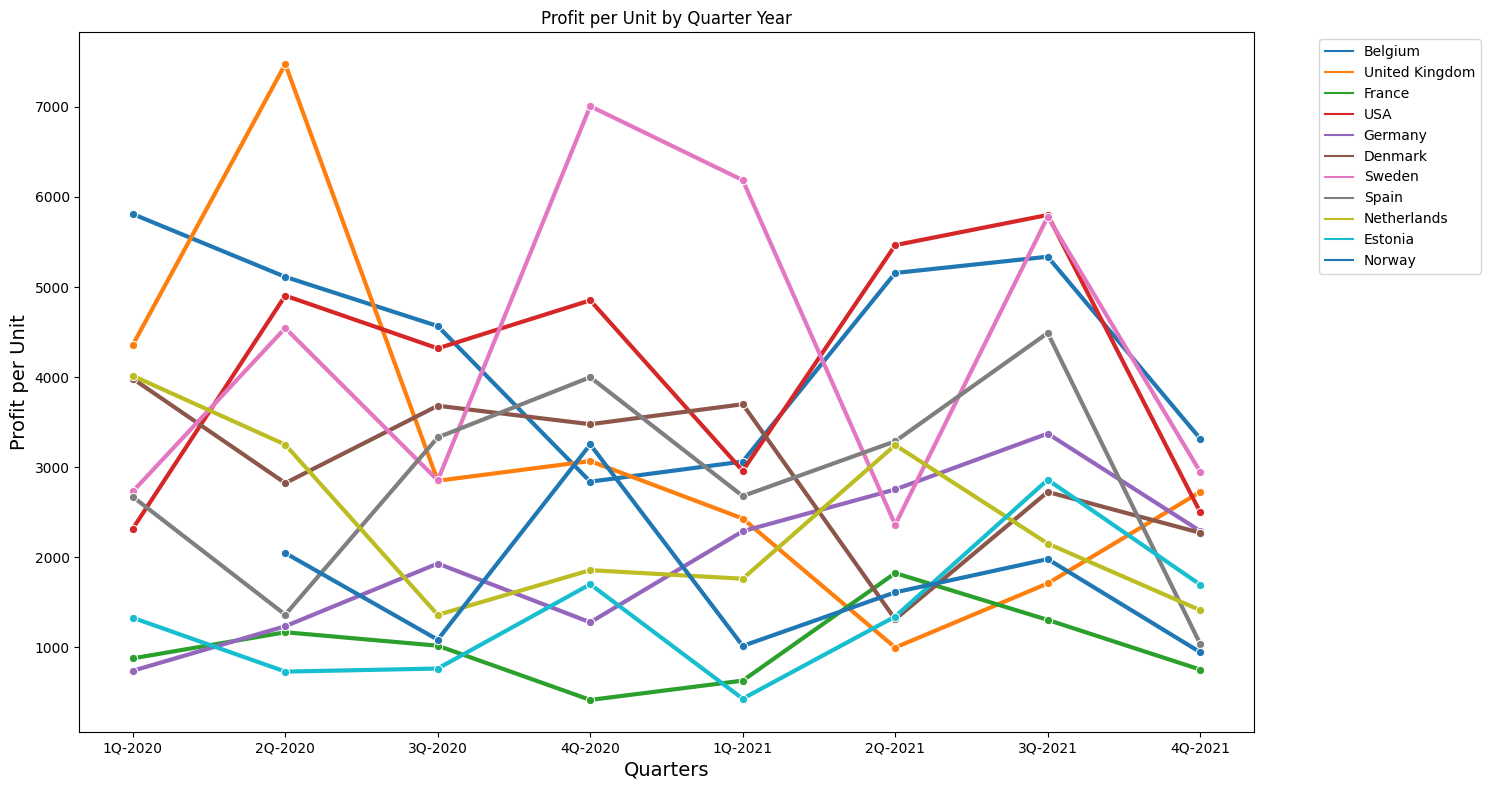

In [26]:
#Pre

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the scatter plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_viz_1, 
             x='Quarter_Year', 
             y='Profit per unit', 
             hue='Country_of_Origin', 
             palette='tab10',
             errorbar=None,
             linewidth=3,
             marker='o')

# Add title and labels
plt.title('Profit per Unit by Quarter Year')
plt.xlabel('Quarters', fontsize=14)
plt.ylabel('Profit per Unit', fontsize=14)
# plt.xticks(rotation=45)
# legend_handles = [mlines.Line2D([], [], color=line[0].get_color(), lw=2, label='Custom Line Label')]
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\vinhp\AppData\Local\Temp\ipykernel_5816\3372373224.py:13: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.lineplot(data=df_viz_1,


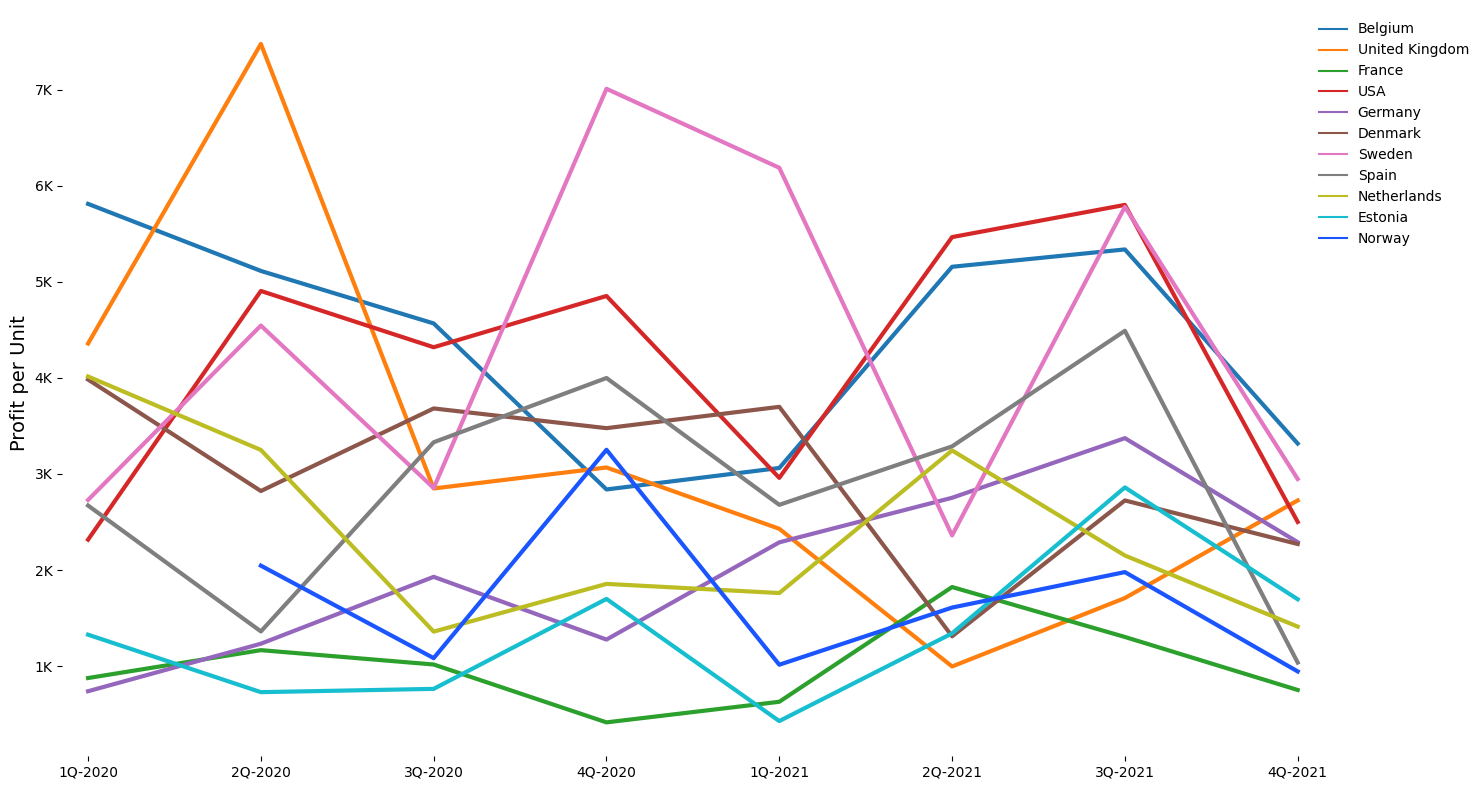

In [27]:
#Post

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
                  "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
                  "#1a55FF", "#FF8C00"]
# Create the scatter plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_viz_1, 
             x='Quarter_Year', 
             y='Profit per unit', 
             hue='Country_of_Origin', 
             palette=custom_palette,
             errorbar=None,
             linewidth=3)

# Add title and labels
# plt.title('Profit per Unit by Quarter Year')
plt.xlabel('')
plt.ylabel('Profit per Unit', fontsize=14)
# plt.xticks(rotation=45)
# legend_handles = [mlines.Line2D([], [], color=line[0].get_color(), lw=2, label='Custom Line Label')]
plt.legend(bbox_to_anchor=(0.96, 1), loc='upper left', frameon=False)

# Remove the x-axis line (bottom spine)
plt.gca().spines[['bottom','top','left','right']].set_visible(False)

# Format the y-axis labels to display values in K format
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

# plt.rc('axes', axisbelow=False)
plt.grid(axis='x', linewidth=2, color='white', zorder=-1)
# plt.grid(True, axis='both', linestyle='--', color='gray', linewidth=0.5, zorder=0)

plt.xlim(plt.xlim()[0] + 0.2)
plt.ylim(plt.ylim()[0] + 0.2)

# Display the plot
plt.tight_layout()
plt.show()

In [28]:
percentiletop_75_percent_products.columns

Index(['Quarter_Year', 'Product_code', 'Name', 'Country_of_Origin',
       'ABV_Category', 'Volume_Category', 'Amount', 'Sale_amount',
       'Discount_amount', 'Profit', 'Retail_sum', 'Profit per unit', 'Rank'],
      dtype='object')

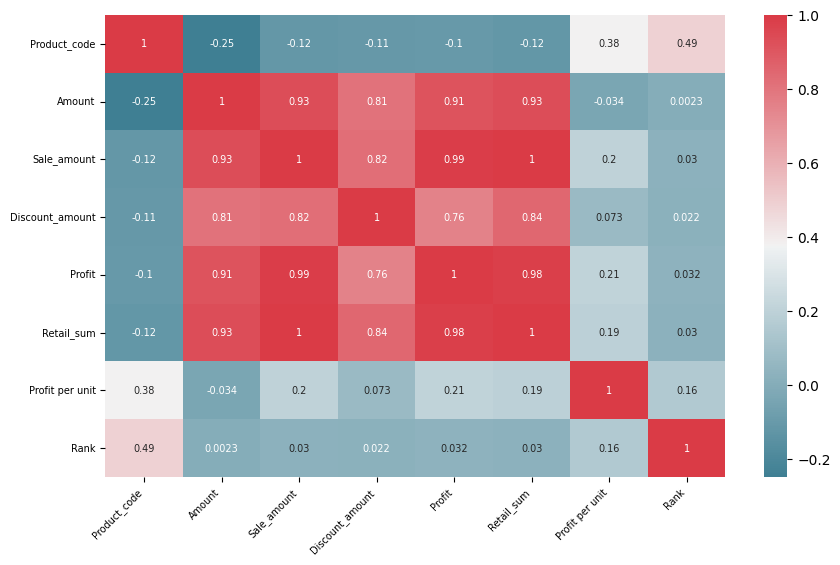

In [29]:
# Creating a correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns 

numerical_columns = percentiletop_75_percent_products.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            annot=True, 
            annot_kws={"fontsize":7}
           )
plt.xticks(rotation=45, ha='right', fontsize=7) 
plt.yticks(fontsize=7) 

plt.show()

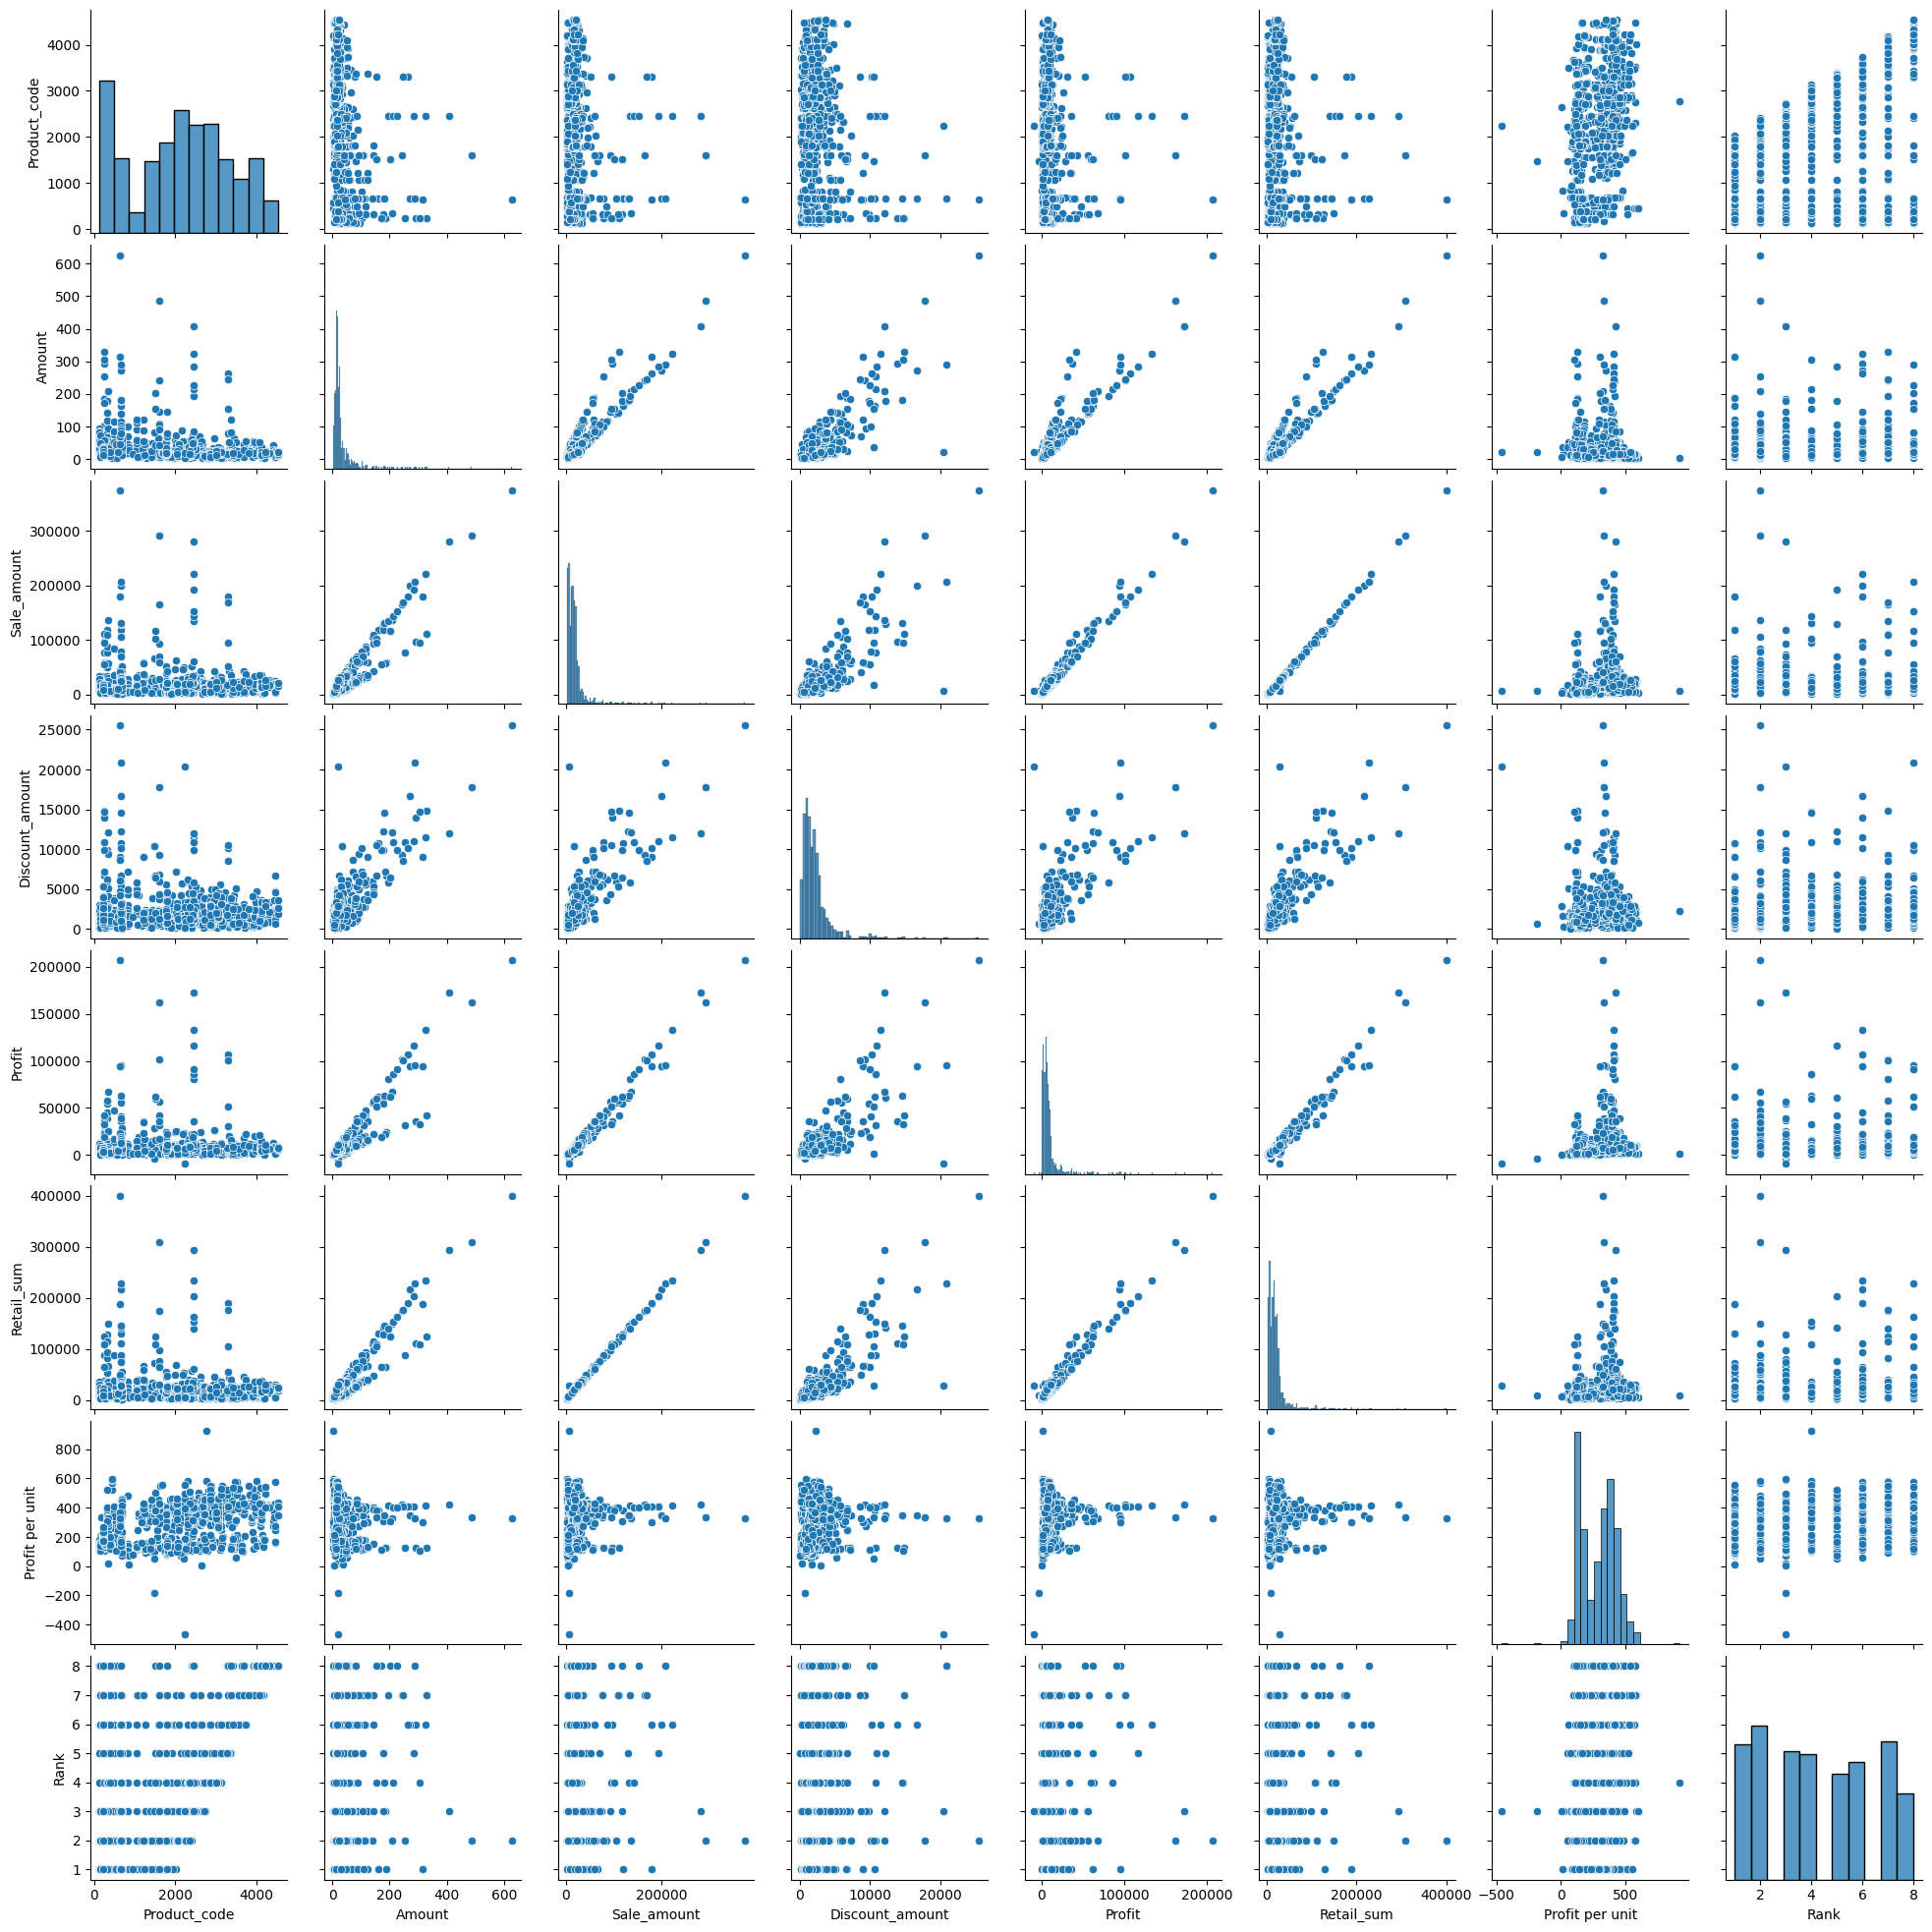

In [30]:
import seaborn as sns

sns.pairplot(percentiletop_75_percent_products)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

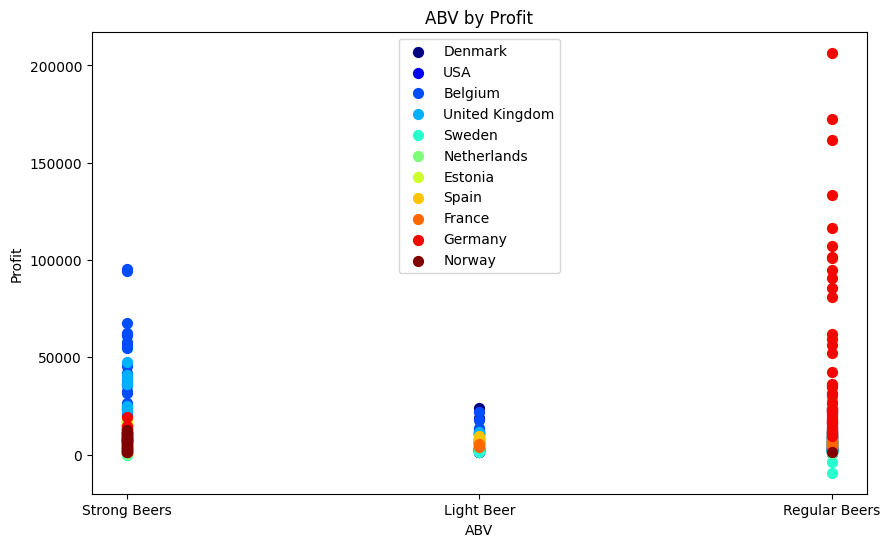

In [35]:
import matplotlib.pyplot as plt

colors = {country: plt.cm.jet(i/float(len(percentiletop_75_percent_products['Country_of_Origin'].unique())-1)) for i, country in enumerate(percentiletop_75_percent_products['Country_of_Origin'].unique())} 
plt.figure(figsize=(10, 6))
for country, color in colors.items():     
    subset = percentiletop_75_percent_products[percentiletop_75_percent_products['Country_of_Origin'] == country]     
    plt.scatter(subset['ABV_Category'], subset['Profit'], c=color, label=country, s=50) 
plt.xlabel('ABV') 
plt.ylabel('Profit') 
plt.title('ABV by Profit') 
plt.legend() 
plt.show()

In [32]:
import matplotlib.pyplot as plt

colors = {country: plt.cm.jet(i/float(len(percentiletop_75_percent_products['Country_of_Origin'].unique())-1)) for i, country in enumerate(percentiletop_75_percent_products['Country_of_Origin'].unique())} 
plt.figure(figsize=(10, 6))
for country, color in colors.items():     
    subset = percentiletop_75_percent_products[percentiletop_75_percent_products['Country_of_Origin'] == country]     
    plt.scatter(subset['ABV'], subset['Sale_amount'], c=color, label=country, s=50) 
plt.xlabel('ABV') 
plt.ylabel('Sale_amount') 
plt.title('ABV by Sale_amount') 
plt.legend() 
plt.show()

KeyError: 'ABV'

<Figure size 1000x600 with 0 Axes>

C:\Users\aryan\AppData\Local\Temp\ipykernel_30176\633810120.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['Name'], (subset['Sale_amount']+subset['Discount_amount'])/subset['Amount'], c=color, label=country, s=50)


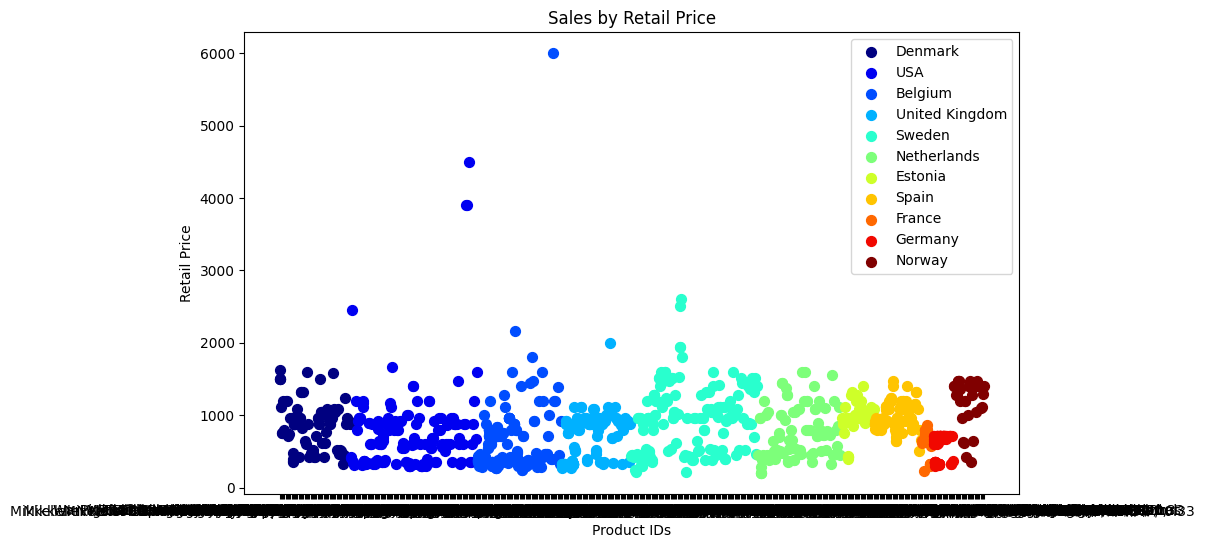

In [ ]:
import matplotlib.pyplot as plt

colors = {country: plt.cm.jet(i/float(len(percentiletop_75_percent_products['Country_of_Origin'].unique())-1)) for i, country in enumerate(percentiletop_75_percent_products['Country_of_Origin'].unique())} 
plt.figure(figsize=(10, 6))
for country, color in colors.items():     
    subset = percentiletop_75_percent_products[percentiletop_75_percent_products['Country_of_Origin'] == country]     
    plt.scatter(subset['Name'], (subset['Sale_amount']+subset['Discount_amount'])/subset['Amount'], c=color, label=country, s=50) 
plt.xlabel('Product IDs') 
plt.ylabel('Retail Price') 
plt.title('Sales by Retail Price') 
plt.legend() 
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# colors = {country: plt.cm.jet(i/float(len(percentiletop_75_percent_products['Country_of_Origin'].unique())-1)) for i, country in enumerate(percentiletop_75_percent_products['Country_of_Origin'].unique())} 
# plt.figure(figsize=(10, 6))
# for country, color in colors.items():     
#     subset = percentiletop_75_percent_products[percentiletop_75_percent_products['Country_of_Origin'] == country]     
#     plt.scatter(subset['Product_code'], subset['ABV'], c=color, label=country, s=50) 
# plt.xlabel('Product IDs') 
# plt.ylabel('ABV') 
# plt.title('ABV by Product ID') 
# plt.legend() 
# plt.show()

# Appendix

In [ ]:
# beer_types = [
#     'Lager', 'Ale', 'Pilsner', 'Wheat Beer', 'Stout', 'Porter', 'IPA (India Pale Ale)',
#     'Sour Beer', 'Belgian Ale', 'Brown Ale', 'Barleywine', 'Kölsch', 'Saison', 'Scotch Ale',
#     'Bock', 'Cream Ale', 'Kettle Sour', 'Amber Ale', 'Red Ale', 'Dunkel', 'Helles', 'Bière de Garde',
#     'Rauchbier', 'Gruit', 'American Amber Ale', 'Märzen', 'Session IPA', 'Blonde Ale', 'Fruit Beer',
#     'Black IPA', 'Belgian Tripel', 'Witbier', 'Kvass', 'Bière Brut', 'Sahti', 'Gose', 'Lambic',
#     'Eisbock', 'Milk Stout', 'Belgian Dubbel', 'Belgian Quadrupel', 'Imperial Pilsner',
#     'English Pale Ale', 'Baltic Porter', 'Belgian Strong Dark Ale', 'Braggot', 'California Common',
#     'Flanders Red Ale', 'Old Ale', 'American Wild Ale', 'Belgian Blonde Ale', 'Belgian Golden Strong Ale',
#     'Grodziskie/Gose/Lichtenhainer', 'Munich Helles', 'Zwickelbier'
# ]

# # Adding the beers from the previous responses
# additional_beers = [
#     'Doppelbock', 'Vienna Lager', 'English IPA', 'Belgian Witbier', 'Berliner Weisse',
#     'Belgian Lambic', 'Mead', 'Cider', 'Bohemian Pilsner', 'English Porter',
#     'American Porter', 'English Stout', 'Russian Imperial Stout', 'Belgian Saison',
#     'Belgian Dubbel', 'Belgian Tripel', 'American Barleywine', 'American Wheat Beer',
#     'American Brown Ale', 'American Blonde Ale', 'American Pale Ale (APA)',
#     'American Amber/Red Ale', 'Scottish Ale', 'Irish Red Ale', 'English Bitter',
#     'English Mild Ale', 'English Strong Ale', 'English Barleywine', 'Irish Dry Stout',
#     'Oatmeal Stout', 'Cream Stout', 'Belgian Dark Ale', 'Belgian Pale Ale', 'Belgian Strong Pale Ale',
#     'English Old Ale', 'Kölsch', 'California Common', 'Belgian Golden Ale', 'Belgian Dark Strong Ale',
#     'Sour Red/Brown Ale', 'American Wild Ale', 'American Brett Beer', 'American Sour Ale',
#     'American Fruit Beer', 'Flanders Oud Bruin', 'Gueuze', 'Lambic - Unblended', 'Berliner Weissbier',
#     'Belgian IPA', 'Black & Tan', 'Shandy', 'Radler', 'Kristalweizen', 'Dunkelweizen', 'Weizenbock',
#     'Kellerbier / Zwickelbier', 'American Pale Wheat Ale', 'Gose', 'Lichtenhainer', 'Braggot',
#     'Sahti', 'Scottish Ale', 'Scottish Export Ale', 'Scottish Heavy Ale', 'Scottish Light Ale',
#     'American Adjunct Lager', 'American Amber / Red Lager', 'American Double / Imperial Pilsner',
#     'American Malt Liquor', 'American Pale Lager', 'California Common / Steam Beer',
#     'Light Lager', 'Malt Liquor', 'American Cream Ale', 'American Imperial Stout', 'American Strong Ale',
#     'American Wild Ale', 'Belgian Blonde Ale', 'Belgian Dark Ale', 'Belgian IPA', 'Belgian Pale Ale',
#     'Belgian Strong Dark Ale', 'Belgian Strong Pale Ale', 'Belgian Tripel', 'Berliner Weissbier',
#     'Bière de Garde', 'Black & Tan', 'Bock', 'Bohemian Pilsener', 'Braggot', 'Doppelbock',
#     'Dortmunder / Export Lager', 'Dunkelweizen', 'Eisbock', 'English Barleywine', 'English Bitter',
#     'English Brown Ale', 'English Dark Mild Ale', 'English India Pale Ale (IPA)', 'English Pale Ale',
#     'English Porter', 'English Stout', 'English Strong Ale', 'Extra Special / Strong Bitter (ESB)',
#     'Flanders Oud Bruin', 'Flanders Red Ale', 'Foreign / Export Stout', 'Fruit / Vegetable Beer',
#     'German Pilsner', 'Gose', 'Hefeweizen', 'Irish Dry Stout', 'Irish Red Ale', 'Kellerbier / Zwickelbier',
#     'Kölsch', 'Lambic - Fruit', 'Milk / Sweet Stout', 'Munich Dunkel Lager', 'Munich Helles Lager',
#     'Märzen / Oktoberfest', 'Oatmeal Stout', 'Old Ale', 'Pumpkin Ale', 'Quadrupel (Quad)',
#     'Rauchbier', 'Russian Imperial Stout', 'Rye Beer', 'Saison / Farmhouse Ale', 'Schwarzbier',
#     'Scotch Ale / Wee Heavy', 'Scottish Ale', 'Scottish Gruit / Ancient Herbed Ale', 'Smoked Beer',
#     'Tripel', 'Vienna Lager', 'Weizenbock', 'Wheatwine'
# ]

# # Combine the lists
# all_beers = beer_types + additional_beers
# print(len(all_beers))

# # Display the combined list of beer types
# print(all_beers)

In [ ]:
# import re

# # Function to extract beer names
# def extract_name(data):
#     pattern = r'\/\s*([\w\s]+)\s*\/'
#     match = re.search(pattern, data)
#     if match:
#         return match.group(1).strip()
#     keywords = ['IPA', 'Cider']
#     for keyword in keywords:
#         if keyword in data:
#             return keyword
#     return 'Others'

# # Extract beer names and create a new column
# percentiletop_95_percent_products['Beer Name'] = percentiletop_95_percent_products['Name'].apply(extract_name)

# # Display the DataFrame
# percentiletop_95_percent_products.head()

In [ ]:
# percentiletop_95_percent_products[['Beer Name']=='Others'].value_counts()